# **Dental X-ray Image Classification - *Single Root | Multi Root***

In this notebook, we are going to perform Image Classification on Dental X-Ray images provided by ADRA as an assigment. We are going to follow below steps:
* Image Preprocessing
* Image Classification using Neural Networks

These two steps further include sub-steps which are explained later.

*This particular task is an application of Computer Vision*.

## **Image (pre)Processing**

The aim of Image Processing (or rather Digital Image Processing) is to improve the image data (features) by suppresing unwanted distortions and/or enhancement of some important image features so that our Computer Vision models can benefit from this improved data to work on.

### Histogram Equalization



> Gray level and contrast variations can make it hard for our model to really learn the right features.
>
>A preprocessing step would be to normalize our data to obtain images with  similar contrasts and that all “look the same”. Histogram equalization is a good way to increase contrast.
>
>Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends and that is what Histogram Equalization does. This normally improves the contrast of the image.




In [ ]:
import cv2
import glob
import os
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
# define a function to apply histogram equalization
def histEqualizer(inputFolder, outputFolder):
  '''
  This function takes the input path, performs histogram equalization,
  and saves the output images in the output path. It also displays the
  input & output images to see and compare the results.

  (inputFolder): path to read input image(s)
  (outputFolder): path to write output image(s)
  '''
  i = 0
  for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img, 0)
    imgEnhanced = cv2.equalizeHist(image)
    cv2.imwrite(outputFolder + "/image%04i.jpg"%i, imgEnhanced)
    i += 1
    imgCompare = cv2.hconcat([image, imgEnhanced])
    cv2_imshow(imgCompare)
    cv2.waitKey(30)
  cv2.destroyAllWindows()

#### Histogram Equalization for One-Root images

In [ ]:
# delete the directory if already exists
try:
  !rm -r /content/hist/one-root/
except:
  pass

# call the histEqualizer() function to apply Histogram Equalization on original image(s).
input = '/content/drive/MyDrive/ADRA - Intern Assignment/one-root'
os.mkdir('/content/hist')
output = '/content/hist/one-root'
os.mkdir(output)
histEqualizer(input, output)

#### Histogram Equalization for Two-or-more-Roots images

In [ ]:
# delete the directory if already exists
try:
  !rm -r /content/hist/multi-root/
except:
  pass

# call the histEqualizer() function to apply Histogram Equalization on original image(s).
input = '/content/drive/MyDrive/ADRA - Intern Assignment/multi-root'
output = '/content/hist/multi-root'
os.mkdir(output)
histEqualizer(input, output)

### Edge Detection

The idea is to define a function that can sketch the edges of any object present on a picture, using Canny edge detection algorithm.

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images.

In [ ]:
# define a function to use Canny Edge Detector
def edgeDetector(inputFolder, outputFolder):
  '''
  This function takes the input path, applies Canny edge detection,
  and saves the output images in the output path. It also displays the
  input & output images to see and compare the results.
  
  (inputFolder): path to read input image(s)
  (outputFolder): path to write output image(s)
  '''
  i = 0
  for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img, 0)
    edges = cv2.Canny(image,120,205)
    cv2.imwrite(outputFolder + "/image%04i.jpg"%i, edges)
    i += 1
    imgCompare = cv2.hconcat([image, edges])
    cv2_imshow(imgCompare)
    cv2.waitKey(30)
  cv2.destroyAllWindows()

#### Edge Detection for One-Root Images


In [ ]:
# delete the directory if already exists
try:
  !rm -r /content/edge/one-root/
except:
  pass

# call the edgeDetector() function to detect the edges on original image(s).
input = '/content/hist/one-root'
os.mkdir('/content/edge')
output = '/content/edge/one-root'
os.mkdir(output)
edgeDetector(input, output)

#### Edge Detection for Two-or-more-Roots Images

In [ ]:
# delete the directory if already exists
try:
  !rm -r /content/edge/multi-root/
except:
  pass

# call the edgeDetector() function to detect the edges on original image(s).
input = '/content/hist/multi-root'
output = '/content/edge/multi-root'
os.mkdir(output)
edgeDetector(input, output)

### Clustering

**Clustering** is the process of grouping or aggregating the pixel values of an image into a certain number of natural classes (or groups) based on statistical similarity.

**K-Means** is one of the most widely used algorithm for clustering because of its simplicity. It basically divides n observations (pixels values in our case) into k clusters (number of classes predefined by us) where each observation belongs to the cluster with the nearest mean.

In [ ]:
# import KMeans algorithm object from Scikit Learn package
from sklearn.cluster import KMeans
# define a funtion to apply KMeans algorithm on our images
def imageCluster(inputFolder, outputFolder, num_clust):
  '''
  This function takes the input path & number of clusters n, applies KMeans algorithm, divide
  an input image into n detected clusters (or groups). Then it saves the output images in the 
  output path. It also displays the input & output images to see and compare the results.
  
  (inputFolder): path to read input image(s)
  (outputFolder): path to write output image(s)
  (num_clust)(int): number of clusters
  '''
  i = 0
  num_clust = int(num_clust)
  for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img)
    image_2D = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
    kmeans = KMeans(n_clusters=num_clust, random_state=0).fit(image_2D)
    clustered = kmeans.cluster_centers_[kmeans.labels_]
    clustered_3D = clustered.reshape(image.shape[0], image.shape[1], image.shape[2])
    cv2.imwrite(outputFolder + "/image%04i.jpg"%i, clustered_3D)
    i += 1
    imgCompare = np.hstack([image, clustered_3D])
    cv2_imshow(imgCompare)
    cv2.waitKey(30)
  cv2.destroyAllWindows()

#### KMeans clustering on Single-Root Images

In [ ]:
# delete the directory if already exists
try:
  !rm -r /content/clust/one-root/
except:
  pass

# call the imageCluster() function to find clusters in original image(s).
input = '/content/hist/one-root'
os.mkdir('/content/clust')
output = '/content/clust/one-root'
os.mkdir(output)
imageCluster(input, output, num_clust=3)

#### KMeans clustering on Two-or-more-Roots Images

In [ ]:
# delete the directory if already exists
try:
  !rm -r /content/clust/multi-root/
except:
  pass

# call the imageCluster() function to find clusters in original image(s).
input = '/content/hist/multi-root'
output = '/content/clust/multi-root'
os.mkdir(output)
imageCluster(input, output, num_clust=3)

## **Image Classification using Artificial Neural Networks**

In this section, we will try and test various Artificial Neural Network (Convolutional Neural Network) architectures to build a computer vision models than can classify the input x-ray images into One-Root or Multi-Roots categories, on the pre-processed image dataset.

In [ ]:
import os
from os import getcwd
import zipfile
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
import IPython
import tensorboard

In [ ]:
# check the number of training images in one-root and multi-root categories
print(len(os.listdir('/content/edge/one-root')))
print(len(os.listdir('/content/edge/multi-root')))

#### Training and validating a model

We will first create directories to split out data into **training** and **validation** sets. The artificial neural network architecture will be trained on the training images, and then validated on the validation images.
We follow scuh practice to come up with a generalized model that can work well on the unseen data.

In [ ]:
try:
    base_dir = '/content/tmp/root-classification/'
    
    train_dir = os.path.join(base_dir, 'training')
    validation_dir = os.path.join(base_dir, 'validation')
    
    train_one_dir = os.path.join(train_dir, 'one')
    validation_one_dir = os.path.join(validation_dir, 'one')
    train_multi_dir = os.path.join(train_dir, 'multi')
    validation_multi_dir = os.path.join(validation_dir, 'multi')
    
    os.mkdir('/content/tmp')
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(train_one_dir)
    os.mkdir(validation_one_dir)
    os.mkdir(train_multi_dir)
    os.mkdir(validation_multi_dir)
    
except OSError as e:
    print(e)

In [ ]:
# train_one_names = os.listdir(train_one_dir)
# train_multi_names = os.listdir(train_multi_dir)

# validation_one_hames = os.listdir(validation_one_dir)
# validation_multi_names = os.listdir(validation_multi_dir)

Next, we will define a function to split the dataset into train and validation given a split ratio.

In [ ]:
# define a function to split data into train and validation
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  '''
  This function function takes input the source directory address, the training directory
  address, the validation directory address and the split ratio (or size).
  It then splits the source data into train and validation.
  '''
  data = os.listdir(SOURCE)
  data = random.sample(data, len(data)) # shuffled
  for count, file in enumerate(data):
    if (count < SPLIT_SIZE * len(data)) and os.path.getsize(f"{SOURCE}/{file}")!=0:
      copyfile(f"{SOURCE}/{file}", f"{TRAINING}/{file}")
    elif (count >= SPLIT_SIZE * len(data)) and os.path.getsize(f"{SOURCE}/{file}")!=0:
      copyfile(f"{SOURCE}/{file}", f"{VALIDATION}/{file}")

# source, train and validation directories
ONE_SOURCE_DIR = "/content/edge/one-root"
TRAINING_ONE_DIR = "/content/tmp/root-classification/training/one"
VALIDATION_ONE_DIR = "/content/tmp/root-classification/validation/one"
MULTI_SOURCE_DIR = "/content/edge/multi-root"
TRAINING_MULTI_DIR = "/content/tmp/root-classification/training/multi"
VALIDATION_MULTI_DIR = "/content/tmp/root-classification/validation/multi"

# call split_data() function to split the data in to train and validation
split_size = .80
split_data(ONE_SOURCE_DIR, TRAINING_ONE_DIR, VALIDATION_ONE_DIR, split_size)
split_data(MULTI_SOURCE_DIR, TRAINING_MULTI_DIR, VALIDATION_MULTI_DIR, split_size)

In [ ]:
# check the number of images in each directory
print(len(os.listdir('/content/tmp/root-classification/training/one')))
print(len(os.listdir('/content/tmp/root-classification/training/multi')))
print(len(os.listdir('/content/tmp/root-classification/validation/one')))
print(len(os.listdir('/content/tmp/root-classification/validation/multi')))

Now we will start with the modelling part. We will first define the architecture of our model.

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(230,130,3)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dropout(0.05),
                                    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer='l1')
])

In [ ]:
# check the model architecture
model.summary()

We can use the below cell to load a pre-saved model. This can be done only after we have trained our model atleast once, and saved that model's weights.

In [ ]:
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")
 
# evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In the below cell, we will define our learning rate. We can use a fixed learning rate, as well as a decaying learning rate. 

When we use a fixed learning rate, the gradient descent might take longer to reach the minima. Consider a case when gradeint descent is very close to the minima. However, due to the fact that the learning rate is large as compared to the distance to the minima, the gradient descent function will keep on oscillaitng around the minima. It may infact never touch that minima.

Therefore, to avoid this problem, we use learning rate decay method. In this method, the learning rate keeps on decaying based on some pre-defined function in each cycle. This allows the gradient descent function to effectively touch the minima.

In [ ]:
batch_size = 8
STEPS_PER_EPOCH = len(os.listdir('/content/tmp/root-classification/training/one'))/batch_size

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(0.001,
                                                             decay_steps=20,
                                                             decay_rate=1,
                                                             staircase=False)

# sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# # model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
# loaded_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

In the next cell, we will define train and validation Data Generators. We use data geenrators when we have small training data. Data Generator allows us to generator more examples using the given training examples.

In each iteration, Data Generator applies different changes to input images - like rotation, zoom, flip etc. This does not necessarily change our input images, but for the model, it's an entirely different image as compared to the original image.

>Let's say we have an image of a cat, with it's head on the left part of the image and the tail on the right. If we flip this image horizontally, we are not changing anything about the cat. But, for the machine, the head and tail are now in opposite direction. So, it becomes an entirely new image for the machine. Because the pixels are situated at different places in the flipped image.

In [ ]:
TRAINING_DIR = '/content/tmp/root-classification/training/'
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(230,130),
                                                   batch_size=8,
                                                   class_mode='binary')

VALIDATION_DIR = '/content/tmp/root-classification/validation/'
validation_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=20,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(230,130),
                                                             batch_size=5,
                                                             class_mode='binary')

In [ ]:
# define a function for early-stopping if the model reaches a desired accuracy
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('acc')>0.99):
#       print("\nReached 99.0% accuracy so cancelling training!")
#       self.model.stop_training = True

In [ ]:
# # Define the Keras TensorBoard callback.
# logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

Now with most of the steps performed, we can go ahead and train our neura network model.

In [ ]:
# train the model
# callbacks = myCallback()
history = model.fit_generator(train_generator,
                              epochs=500,
                              verbose=2,
                              validation_data=validation_generator)#,
                              # callbacks=[callbacks])

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs

After training, it's time to check the *accuracy* and *loss* graphs with respect to *the number of epochs*. We will see the graph for both - training as well as validation data.

Text(0.5, 1.0, 'Training and Validation Loss')

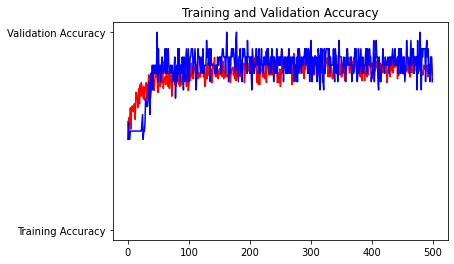

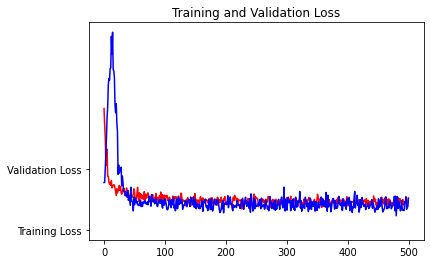

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and Validation Accuracy')


plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and Validation Loss')

#### Testing the model

It's time to test our model on entirely unseen data. Let's do that!

In [ ]:
# remove the image files from directory, if already exists
try:
  !rm  /content/*.jpg
except:
  pass

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

# define a function to read, pre-process and predict the image class.
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  # img = image.load_img(path, target_size=(230,130,3))
  img = cv2.imread(path, 0)
  img = cv2.equalizeHist(img)
  img = cv2.Canny(img, 120, 105)
  img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " has only One Root.")
  else:
    print(fn + " has Two or more Roots.")

Saving tooth6.jpg to tooth6.jpg
Saving tooth15.jpg to tooth15.jpg
Saving tooth33.jpg to tooth33.jpg
Saving tooth59.jpg to tooth59.jpg
[0.]
tooth6.jpg has Two or more Roots.
[0.]
tooth15.jpg has Two or more Roots.
[1.]
tooth33.jpg has only One Root.
[1.]
tooth59.jpg has only One Root.


#### Saving the model weights

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# saving the above model weights to google drive
%cp -av '/content/model.h5' '/content/drive/MyDrive/ADRA - Intern Assignment'
%cp -av '/content/model.json' '/content/drive/MyDrive/ADRA - Intern Assignment'

'/content/model.h5' -> '/content/drive/MyDrive/ADRA - Intern Assignment/model.h5'
'/content/model.json' -> '/content/drive/MyDrive/ADRA - Intern Assignment/model.json'


### Visualizing Intermediate Representations

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import random
# from tensorflow.keras.preprocessing.image import img_to_array, load_img

# # Let's define a new Model that will take an image as input, and will output
# # intermediate representations for all layers in the previous model after
# # the first.
# successive_outputs = [layer.output for layer in model.layers[1:]]

# #visualization_model = Model(img_input, successive_outputs)
# visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# # Let's prepare a random input image from the training set.
# one_img_files = [os.path.join(train_one_dir, f) for f in train_one_names]
# multi_img_files = [os.path.join(train_multi_dir, f) for f in train_one_names]
# img_path = random.choice(one_img_files + multi_img_files)

# img = load_img(img_path, target_size=(230, 130))
# x = img_to_array(img)  # Numpy array with shape (230, 130, 3)
# x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 230, 130, 3)

# # Rescale by 1/255
# x /= 255.

# # Let's run our image through our network, thus obtaining all
# # intermediate representations for this image.
# successive_feature_maps = visualization_model.predict(x)

# # These are the names of the layers, so can have them as part of our plot
# layer_names = [layer.name for layer in model.layers]

# # Now let's display our representations
# for layer_name, feature_map in zip(layer_names, successive_feature_maps):
#   print(len(feature_map.shape))
#   if len(feature_map.shape) == 4:
#     # print(len(feature_map.shape))
#     # Just do this for the conv / maxpool layers, not the fully-connected layers
#     n_features = feature_map.shape[-1]  # number of features in feature map
#     # print("n_features: ", n_features)
#     # The feature map has shape (1, size, size, n_features)
#     size = feature_map.shape[1]
#     # print("size: ", size)
#     # We will tile our images in this matrix
#     display_grid = np.zeros((size, size * n_features))
#     # print(display_grid)
#     for i in range(n_features):
#       # Postprocess the feature to make it visually palatable
#       x = feature_map[0, :, :, i]
#       x -= x.mean()
#       x /= x.std()
#       x *= 64
#       x += 128
#       x = np.clip(x, 0, 255).astype('uint8')
#       # print('x:', x)
#       # We'll tile each filter into this big horizontal grid
#       # display_grid[:, i * size : (i + 1) * size] = x
#     # Display the grid
#     scale = 20. / n_features
#     plt.figure(figsize=(scale * n_features, scale))
#     plt.title(layer_name)
#     plt.grid(False)
#     plt.imshow(display_grid, aspect='auto', cmap='viridis')

## **Transfer Learning - Google Inception V3**

In [ ]:
os.mkdir('/content/tmp2/')

%cp -av '/content/drive/MyDrive/ADRA - Intern Assignment/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' '/content/tmp2/'

In [ ]:
path_inception = f"{getcwd()}/tmp2/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = path_inception

pre_trained_model = InceptionV3(
    input_shape=(230, 130, 3),
    include_top=False,
    weights=None
)
pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy']
             )

# model.summary()

In [ ]:
TRAINING_DIR = '/content/tmp/root-classification/training/'
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(230,130),
                                                   batch_size=8,
                                                   class_mode='binary')

VALIDATION_DIR = '/content/tmp/root-classification/validation/'
validation_datagen = ImageDataGenerator(rescale=1./255.)
                                      #  rotation_range=40,
                                      #  width_shift_range=0.2,
                                      #  height_shift_range=0.2,
                                      #  shear_range=0.2,
                                      #  zoom_range=0.2,
                                      #  horizontal_flip=True,
                                      #  fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(230,130),
                                                             batch_size=2,
                                                             class_mode='binary')

In [ ]:
callbacks = myCallback()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=None)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## **Trying CNN on Clustered Data**

In [ ]:
import os
from os import getcwd
import zipfile
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
import IPython
import tensorboard

In [ ]:
try:
    base_dir = '/content/tmp2/root-classification/'
    
    train_dir = os.path.join(base_dir, 'training')
    validation_dir = os.path.join(base_dir, 'validation')
    
    train_one_dir = os.path.join(train_dir, 'one')
    validation_one_dir = os.path.join(validation_dir, 'one')
    train_multi_dir = os.path.join(train_dir, 'multi')
    validation_multi_dir = os.path.join(validation_dir, 'multi')
    
    os.mkdir('/content/tmp2')
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(train_one_dir)
    os.mkdir(validation_one_dir)
    os.mkdir(train_multi_dir)
    os.mkdir(validation_multi_dir)
    
except OSError as e:
    print(e)

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    data = os.listdir(SOURCE)
    data = random.sample(data, len(data)) # shuffled
    for count, file in enumerate(data):
        if(count < SPLIT_SIZE * len(data)) and os.path.getsize(f"{SOURCE}/{file}")!=0:
            copyfile(f"{SOURCE}/{file}", f"{TRAINING}/{file}")
        elif (count >= SPLIT_SIZE * len(data)) and os.path.getsize(f"{SOURCE}/{file}")!=0:
            copyfile(f"{SOURCE}/{file}", f"{VALIDATION}/{file}")


ONE_SOURCE_DIR = "/content/clust/one-root"
TRAINING_ONE_DIR = "/content/tmp2/root-classification/training/one"
VALIDATION_ONE_DIR = "/content/tmp2/root-classification/validation/one"
MULTI_SOURCE_DIR = "/content/clust/multi-root"
TRAINING_MULTI_DIR = "/content/tmp2/root-classification/training/multi"
VALIDATION_MULTI_DIR = "/content/tmp2/root-classification/validation/multi"

split_size = .80
split_data(ONE_SOURCE_DIR, TRAINING_ONE_DIR, VALIDATION_ONE_DIR, split_size)
split_data(MULTI_SOURCE_DIR, TRAINING_MULTI_DIR, VALIDATION_MULTI_DIR, split_size)

In [ ]:
print(len(os.listdir('/content/tmp2/root-classification/training/one')))
print(len(os.listdir('/content/tmp2/root-classification/training/multi')))
print(len(os.listdir('/content/tmp2/root-classification/validation/one')))
print(len(os.listdir('/content/tmp2/root-classification/validation/multi')))

In [ ]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(230,130,3)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(16, activation='relu'),
                                    tf.keras.layers.Dropout(0.05),
                                    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer='l1')
])

In [ ]:
model2.summary()

In [ ]:
batch_size = 8
STEPS_PER_EPOCH = len(os.listdir('/content/tmp/root-classification/training/one'))/batch_size

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(0.001,
                                                             decay_steps=20,
                                                             decay_rate=1,
                                                             staircase=False)

# sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# # model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

In [ ]:
TRAINING_DIR = '/content/tmp/root-classification/training/'
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(230,130),
                                                   batch_size=8,
                                                   class_mode='binary')

VALIDATION_DIR = '/content/tmp/root-classification/validation/'
validation_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=20,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(230,130),
                                                             batch_size=5,
                                                             class_mode='binary')

In [ ]:
history = model2.fit_generator(train_generator,
                              epochs=200,
                              verbose=2,
                              validation_data=validation_generator)

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and Validation Accuracy')


plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and Validation Loss')